In [2]:
import math
import numpy as np

In [17]:
from numericne_metode import matrix_decomposition
from numericne_metode import newton_interpolation
from numericne_metode import pnea

from optimizacijske_metode import hungarian_method
from optimizacijske_metode import potence_relacij
from optimizacijske_metode import simplex_method

from operacijske_metode import edit_distance
from operacijske_metode import traveling_salesman


## NUMERIČNE METODE

coefficients:  ['0', '1', '0', '-1/6', '0', '1/120', '0', '-1/5040', '0', '1/362880', '0', '-1/39916800', '0', '1/6227020800', '0', '-1/1307674368000', '0', '1/355687428096000', '0', '-1/121645100408832000', '0', '1/51090942171709440000', '0', '-1/25852016738884976640000', '0']


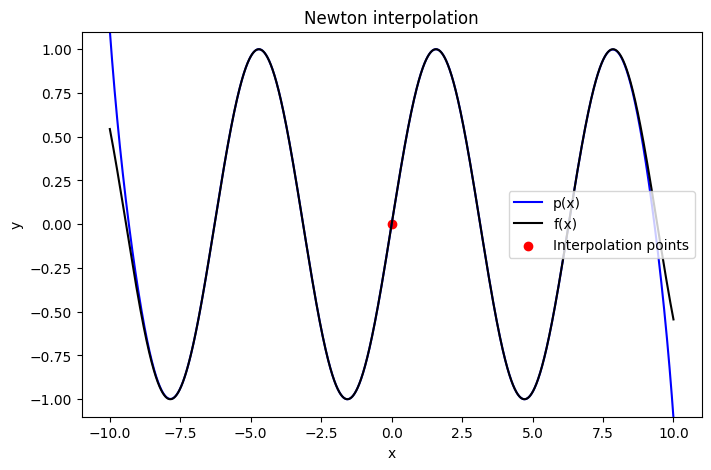

In [4]:
# Razvijmo funkcijo sin(x) v Taylorjevo vrsto z uporabo Newtonove interpolacije
def f(x): return math.sin(x)
n = 25
x_values = [0 for _ in range(n)]
y_values = [(-i%2)*(-1 if i%4==3 else 1) for i in range(n)]
newton_interpolation.plot(x_values=x_values, y_values=y_values, A=10, B=10, f=f, y_min=-1.1, y_max=1.1, fractions=True)


E0 = [0.0, 0.25, 0.5, 0.75, 1.0]


Ax = b je ~ekvivalentno:
['-1.000', '-1.000', '-0.000', '-0.000', '-0.000'] 	    [m] 	    [-0.000]
['1.000', '-1.000', '-0.250', '-0.062', '-0.016'] 	    [a0] 	    [-0.485]
['-1.000', '-1.000', '-0.500', '-0.250', '-0.125'] 	 x  [a1] 	 =  [-0.629]
['1.000', '-1.000', '-0.750', '-0.562', '-0.422'] 	    [a2] 	    [-0.539]
['-1.000', '-1.000', '-1.000', '-1.000', '-1.000'] 	    [a3] 	    [-0.602]
x = [0.017650449137412302, -0.017650449137412212, 3.2305498054545345, -5.261040735464174, 2.632230846151751], 
norm2(Ax-b) = 7.684648783111277e-16

u = max(abs(r(x))) = 0.038271600573295705, x* = 0.1320975173853854

E1 = [0.0, 0.1320975173853854, 0.5, 0.75, 1.0]


Ax = b je ~ekvivalentno:
['-1.000', '-1.000', '-0.000', '-0.000', '-0.000'] 	    [m] 	    [-0.000]
['1.000', '-1.000', '-0.132', '-0.017', '-0.002'] 	    [a0] 	    [-0.285]
['-1.000', '-1.000', '-0.500', '-0.250', '-0.125'] 	 x  [a1] 	 =  [-0.629]
['1.000', '-1.000', '-0.750', '-0.562', '-0.422'] 	   

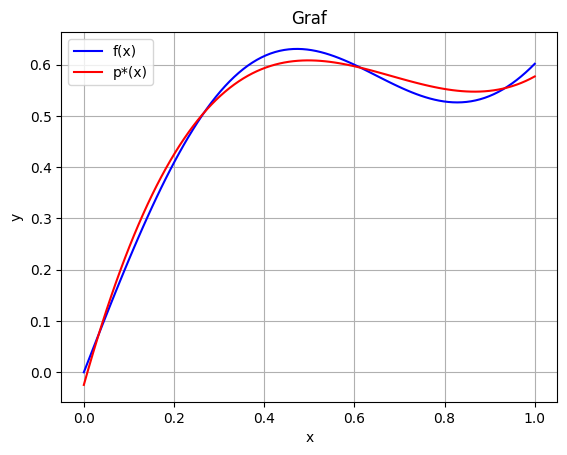

koef = [-0.02465282645773639, 3.145816329140453, -4.974838756466975, 2.430762343468635]
E = [0.0, 0.127370345981982, 0.43456445159159157, 0.7880090704824825, 1.0]


In [5]:
def f(x):
    return math.sin(5*x)/4 + math.sin(x)

# Polinom po metodi polinoma najboljše enakomerne aproksimacije, za f, stopnje n, na intervalu od q=0 do w=1:  
n = 3   
E = np.linspace(0, 1, n + 2).tolist()
koef, E = pnea.PNEA(E=E, f=f, q=0, w=1, draw=True, tolerance=1e-10, max_iterations=100)
# Funkcija prikaže tudi celoten postopek, če je predolg, si ga oglejte v text editorju

In [10]:
def inf_norm_diff(v1, v2):
    """Vrne maksimalno absolutno razliko med vektorjema v1 in v2"""
    return max(abs(a - b) for a, b in zip(v1, v2))

n = 10
np.random.seed(42)
A = np.random.rand(n, n).tolist()
b = np.random.rand(n).tolist()

methods = [
    ("Householder", matrix_decomposition.Householder_solve),
    ("LU", matrix_decomposition.LU_solve),
    ("Givens", matrix_decomposition.Givens_solve),
    ("QR", matrix_decomposition.QR_solve),
    ("Cholesky", matrix_decomposition.Cholesky_solve),
]

for name, solver in methods:
    try:
        if name == "Cholesky":
            A_simetric = matrix_decomposition.Mdot(A, matrix_decomposition.transpose(A))
            # Zagotovimo pozitivno definitnost
            A_simetric = [[A_simetric[i][j] + 1 if i==j else A_simetric[i][j] for j in range(len(A))] for i in range(len(A))]
            x = solver(A_simetric, b)
            b_approx = matrix_decomposition.Mdot(A_simetric, x)
        else:
            x = solver(A, b)
            b_approx = matrix_decomposition.Mdot(A, x)
        error = inf_norm_diff(b, b_approx)
        print(f"{name} napaka: {error:.3e}")
    except Exception as e:
        print(f"{name} ni uspelo: {e}")

Householder napaka: 5.551e-16
LU napaka: 7.244e-15
Givens napaka: 7.772e-16
QR napaka: 2.109e-15
Cholesky napaka: 2.144e-01


## OPTIMIZACIJSKE

In [12]:
M = [[9,5,9,11,9,3],
[4,6,3,9,4,8],
[12,8,9,9,11,4],
[9,12,9,8,6,3],
[11,7,12,9,8,7],
[5,7,10,2,4,3]]

hungarian_method.matrix_sum(M, "min", show_steps=True)

Original
[9, 5, 9, 11, 9, 3]
[4, 6, 3, 9, 4, 8]
[12, 8, 9, 9, 11, 4]
[9, 12, 9, 8, 6, 3]
[11, 7, 12, 9, 8, 7]
[5, 7, 10, 2, 4, 3]


Rows
[6, 2, 6, 8, 6, 0]
[1, 3, 0, 6, 1, 5]
[8, 4, 5, 5, 7, 0]
[6, 9, 6, 5, 3, 0]
[4, 0, 5, 2, 1, 0]
[3, 5, 8, 0, 2, 1]


Cols
[5, 2, 6, 8, 5, 0]
[0, 3, 0, 6, 0, 5]
[7, 4, 5, 5, 6, 0]
[5, 9, 6, 5, 2, 0]
[3, 0, 5, 2, 0, 0]
[2, 5, 8, 0, 1, 1]


Matching
[3, 0, 4, 6, 3, 0]
[0, 3, 0, 6, 0, 7]
[5, 2, 3, 3, 4, 0]
[3, 7, 4, 3, 0, 0]
[3, 0, 5, 2, 0, 2]
[2, 5, 8, 0, 1, 3]


Matching
[1, 0, 2, 4, 3, 0]
[0, 5, 0, 6, 2, 9]
[3, 2, 1, 1, 4, 0]
[1, 7, 2, 1, 0, 0]
[1, 0, 3, 0, 0, 2]
[2, 7, 8, 0, 3, 5]


Matching
[0, 0, 1, 4, 3, 0]
[0, 6, 0, 7, 3, 10]
[2, 2, 0, 1, 4, 0]
[0, 7, 1, 1, 0, 0]
[0, 0, 2, 0, 0, 2]
[1, 7, 7, 0, 3, 5]


positions: [(0, 0), (1, 2), (2, 5), (3, 4), (4, 1), (5, 3)]


'min sum: 31'

In [13]:
# nastavi n in R in zaženi kodo    
R = {(1,2),(2,3),(2,5),(3,1),(3,4),(4,2),(5,1),(5,4)}  
n = 2
print(f"R^{n} = {potence_relacij.Relation(R, n)}\n")

R^2 = {(2, 4), (2, 1), (1, 5), (4, 3), (4, 5), (3, 2), (1, 3), (5, 2)}



In [15]:
from fractions import Fraction

c = [400, 600, 480] 
A = [[1, 1, 1], [60, 80, 100], [240, 400, 320]] 
b = [50, 5000, 24000]

simplex_method.simplex_method(A, b, c)


print("\n")

c = [3, 2] 
A = [[2, Fraction(1, 99)], [Fraction(1, 99), Fraction(3, 2)], [Fraction(1, 9), Fraction(1, 99)]] 
b = [18, 42, 24]

simplex_method.simplex_method(A, b, c)

Optimal solution: ['0', '50', '0'] == [0.0, 50.0, 0.0]
Dual variable values: ['0', '1000', '4000'] == [0.0, 1000.0, 4000.0]
Optimal value: 30000 == 30000.0


Optimal solution: ['260469/29402', '410751/14701'] == [8.8589, 27.9403]
Dual variable values: ['0', '0', '668409/29402'] == [0.0, 0.0, 22.7335]
Optimal value: 2424411/29402 == 82.4573


## OPERACIJSKE

In [18]:
edit_distance.editDistance("ponedeljek", "petek", showSolution=True)

Edit distance = 6
Operations:
Delete o
Delete n
Delete e
Delete d
Delete l
Replace j with t


In [20]:
import random
n = 20  # Number of cities
C = [[0 if i == j else random.randint(10, 100) for j in range(n)] for i in range(n)]
traveling_salesman.traveling_salesman(C)

######### RESULTS ##############
Optimal route (edges): [(0, 15), (1, 16), (2, 6), (3, 2), (4, 19), (5, 0), (6, 14), (7, 18), (8, 5), (9, 8), (10, 4), (11, 9), (12, 3), (13, 11), (14, 17), (15, 7), (16, 10), (17, 1), (18, 12), (19, 13)] 

Total cost of the route: 347.0 

Matrix C:
  0  55  50  41  14  60  13  59  47   30  93   79  52  59  85  19  100  69   68  29
 83   0  13  99  55  31  24  69  58   21  29   95  56  62  50  59   26  47   92  85
 35  98   0  73  14  26  13  44  81  100  45  100  19  23  70  77   89  31   37  40
 45  64  19   0  86  71  85  50  57   61  95   69  75  38  98  94   52  34   83  41
100  50  50  37   0  39  71  49  46   34  17   40  60  35  73  23   42  56   31  14
 11  38  35  91  34   0  87  26  12   94  57   56  93  83  96  45   53  42  100  17
 69  72  12  86  23  96   0  76  99   23  71   59  63  80  16  90   47  66   91  77
 46  72  57  76  57  62  16   0  60   33  32   10  54  67  30  43   48  91   11  11
 15  93  16  36  16  25  23  28   0   58  27  